<a href="https://colab.research.google.com/github/michp15/statistical_learning_class/blob/main/stat_learn_classif_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary packages.

install.packages('corrplot')
install.packages('naniar')
install.packages('glmnet')
install.packages('VIM')
install.packages(c("doParallel", "foreach"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘plyr’, ‘norm’, ‘visdat’, ‘viridis’, ‘UpSetR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘zoo’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘DEoptimR’, ‘lmtest’, ‘proxy’, ‘car’, ‘robustbase’, ‘sp’, ‘vcd’, ‘e1071’, ‘laeken’, ‘ranger’


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Import packages.

library(utils)
library(corrplot)
library(dplyr)
library(naniar)
library(tidyverse)
library(glmnet)
library(tidyr)
library(VIM)
library(foreach)
library(doParallel)

corrplot 0.95 loaded


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8

Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions an

In [ ]:
# Download dataset.

download.file('https://raw.githubusercontent.com/michp15/statistical_learning_class/refs/heads/main/bank-additional-full.csv', 'bank.csv')

In [ ]:
# Read dataset.

df = read.csv('bank.csv', sep=';')

In [ ]:
# Inspect dataset for correct formatting.

head(df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [ ]:
# View types.

str(df)

'data.frame':	41188 obs. of  21 variables:
 $ age           : int  56 57 37 40 56 45 59 41 24 25 ...
 $ job           : chr  "housemaid" "services" "services" "admin." ...
 $ marital       : chr  "married" "married" "married" "married" ...
 $ education     : chr  "basic.4y" "high.school" "high.school" "basic.6y" ...
 $ default       : chr  "no" "unknown" "no" "no" ...
 $ housing       : chr  "no" "no" "yes" "no" ...
 $ loan          : chr  "no" "no" "no" "no" ...
 $ contact       : chr  "telephone" "telephone" "telephone" "telephone" ...
 $ month         : chr  "may" "may" "may" "may" ...
 $ day_of_week   : chr  "mon" "mon" "mon" "mon" ...
 $ duration      : int  261 149 226 151 307 198 139 217 380 50 ...
 $ campaign      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays         : int  999 999 999 999 999 999 999 999 999 999 ...
 $ previous      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutcome      : chr  "nonexistent" "nonexistent" "nonexistent" "nonexistent" ...
 $ emp.var.rate  : num  1.1 1.1 1.1 1

In [ ]:
# View distributions of categorical data.

for (col in colnames(df)){
  if (!is.numeric(df[, col])){
    print(col)
    print(table(df[, col]))
    cat('\n\n')
  }
}

[1] "job"

       admin.   blue-collar  entrepreneur     housemaid    management 
        10422          9254          1456          1060          2924 
      retired self-employed      services       student    technician 
         1720          1421          3969           875          6743 
   unemployed       unknown 
         1014           330 


[1] "marital"

divorced  married   single  unknown 
    4612    24928    11568       80 


[1] "education"

           basic.4y            basic.6y            basic.9y         high.school 
               4176                2292                6045                9515 
         illiterate professional.course   university.degree             unknown 
                 18                5243               12168                1731 


[1] "default"

     no unknown     yes 
  32588    8597       3 


[1] "housing"

     no unknown     yes 
  18622     990   21576 


[1] "loan"

     no unknown     yes 
  33950     990    6248 


[1] "contact"

In [ ]:
# Remove the 'duration' and 'default' columns. Removing 'duration' prevent data leakage, and default is just uninformative.

duration_vec <- c()
index <- 1
for (col in colnames(df)){
  if (col == 'duration' | col == 'default'){
    duration_vec[index] <- TRUE
  } else {
    duration_vec[index] <- FALSE
  }
  index <- index + 1
}
df <- df[, !duration_vec]
rm(duration_vec)
rm(index)

In [ ]:
# Function that checks for and removes duplicates.

check_remove_duplicates <- function(df) {
  duplicates <- duplicated(df)

  if (any(duplicates)){
    cat('There are:', sum(duplicates), 'duplicates.')
    df <- df[!duplicates,]
    cat('\n\nDuplicates removed.')
  }

  return (df)
}

In [ ]:
# Remove duplicates.

df <- check_remove_duplicates(df)

There are: 1997 duplicates.

Duplicates removed.

In [ ]:
# Check for null values.

cat(any(is.na(df)))

FALSE

In [ ]:
# Check dependent variable distribution.

table(df$y)


   no   yes 
34594  4597 

In [ ]:
# The number of rows that have 'pdays' equal to 999.

sum(df$pdays == 999)

[1] 37677

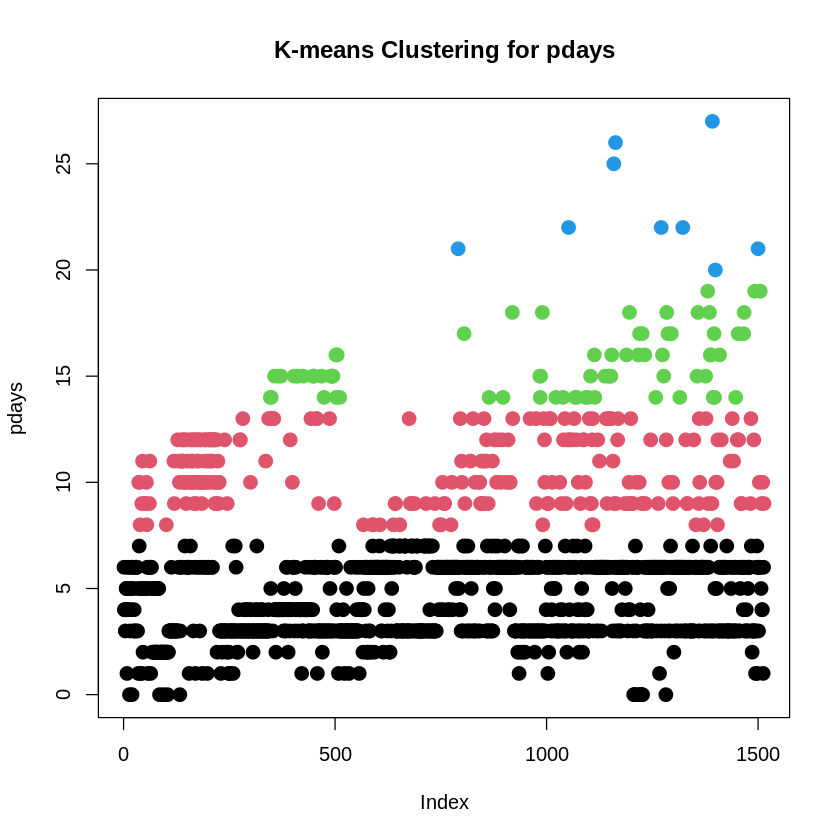

In [ ]:
# Cluster 'pdays' in meaningful categories to resolve the '999' problem

set.seed(123)
kmeans_result <- kmeans(df[df$pdays != 999, 'pdays'], centers = 4, algorithm='Hartigan-Wong')
plot(df[df$pdays != 999, 'pdays'],
     col = kmeans_result$cluster,
     pch = 19,
     main = "K-means Clustering for pdays",
     xlab = "Index",
     ylab = "pdays",
     col.axis = "black",
     cex = 1.5)

In [ ]:
# Check cluster separation.

kmeans_result$betweenss / kmeans_result$totss # -> well separated clusters

[1] 0.814126

In [ ]:
# The cluster centroids.

kmeans_result$centers

1,4.29932
2,10.59375
3,15.54795
4,22.88889


In [ ]:
# Function to get the index of the minimum value in a vector.

argmin <- function(vec){
  min <- vec[1]
  min_index <- 1
  for (i in 1:length(vec)){
    if (vec[i] < min){
      min <- vec[i]
      min_index <- i
    }
  }
  return (min_index)
}

# Function to compute the Euclidean distance between two 1D points.

euc_distance <- function(x, y){
  return (abs(y - x))  # sqrt((y - x)^2) simplifies to abs(y - x)
}

# Function to find the index of the closest value in a 1D vector.

argmin_distances <- function(x, vec){
  distances <- sapply(vec, function(v) euc_distance(x, v))
  return (argmin(distances))
}

# Encoding 'pdays' based on proximity to k-means cluster centers.

pdays_new_values <- character(nrow(df))

for (i in 1:nrow(df)){
  if (df[i, 'pdays'] == 999){
    pdays_new_values[i] <- 'Never'
  } else {
    temp <- argmin_distances(df[i, 'pdays'], kmeans_result$centers)
    temp <- switch(temp,
                   '1' = 'Very Recent',
                   '2' = 'Recent',
                   '3' = 'Moderate',
                   '4' = 'Older')
    pdays_new_values[i] <- temp
  }
}

df$pdays <- pdays_new_values

rm(pdays_new_values)

In [ ]:
# Remove duplicates.

df <- check_remove_duplicates(df)

There are: 5 duplicates.

Duplicates removed.

In [ ]:
# Find unique values for each categorical column.

for (colname in colnames(df)){
  if (!is.numeric(df[[colname]])){
    cat(colname,'\n')
    cat(unique(df[[colname]]))
    cat('\n\n')
  }
}

job 
housemaid services admin. blue-collar technician retired management unemployed self-employed unknown entrepreneur student

marital 
married single divorced unknown

education 
basic.4y high.school basic.6y basic.9y professional.course unknown university.degree illiterate

housing 
no yes unknown

loan 
no yes unknown

contact 
telephone cellular

month 
may jun jul aug oct nov dec mar apr sep

day_of_week 
mon tue wed thu fri

pdays 
Never Very Recent Recent Moderate Older

poutcome 
nonexistent failure success

y 
no yes



In [ ]:
# Encode dependent variable 'y'.

df$y <- as.numeric(ifelse(df$y == 'yes', 1, 0))

In [ ]:
# Encode 'month' and 'day_of_week' columns.

for (i in 1:nrow(df)){
  df[i, 'month'] <- switch(df[i, 'month'],
                           'mar' = 0,
                           'apr' = 1,
                           'may' = 2,
                           'jun' = 3,
                           'jul' = 4,
                           'aug' = 5,
                           'sep' = 6,
                           'oct' = 7,
                           'nov' = 8,
                           'dec' = 9)

  df[i, 'day_of_week'] <- switch(df[i, 'day_of_week'],
                                 'mon' = 0,
                                 'tue' = 1,
                                 'wed' = 2,
                                 'thu' = 3,
                                 'fri' = 4)
}

df$month <- as.numeric(df$month)
df$day_of_week <- as.numeric(df$day_of_week)

df$sin_month <- sin(2 * pi * df$month / 10)
df$cos_month <- cos(2 * pi * df$month / 10)
df$sin_day_of_week <- sin(2 * pi * df$day_of_week / 5)
df$cos_day_of_week <- cos(2 * pi * df$day_of_week / 5)

df <- subset(df, select = -c(month, day_of_week))

In [ ]:
# Encode the 'contact' column.

names(df)[names(df) == 'contact'] <- 'mobile_phone'
df$mobile_phone <- as.numeric(ifelse(df$mobile_phone == 'cellular', 1, 0))

In [ ]:
# Remove duplicates.

df <- check_remove_duplicates(df)

In [ ]:
# replace 'unknown' values with NA.

for (row in 1:nrow(df)){
  for (col in colnames(df)){
    if (df[row, col] == 'unknown'){
      df[row, col] <- NA
    }
  }
}

In [ ]:
# Convert all character columns to factors.

df[] <- lapply(df, function(x) if(is.character(x)) as.factor(x) else x)

In [ ]:
# Chi-Square Test or Fisher's Exact Test for MCAR on categorical variables
test_mcar_chisq <- function(df) {
  results <- list()

  # Identify categorical columns
  categorical_cols <- names(df)[sapply(df, is.factor)]

  for (col in categorical_cols) {
    # Create missingness flag column for the current categorical column
    df$missing_flag <- ifelse(is.na(df[[col]]), 1, 0)

    # Perform Chi-Square test for independence between missingness and all other categorical variables
    for (other_col in categorical_cols) {
      if (col != other_col) {
        # Create contingency table for Chi-Square test
        table <- table(df[[other_col]], df$missing_flag)

        # Check if any expected frequencies are too small
        expected <- chisq.test(table)$expected
        if ((sum(expected < 5) / length(expected)) > 0.2) {
          # If expected frequencies are small, use Fisher's Exact Test with simulation
          fisher_test <- fisher.test(table, simulate.p.value = TRUE)
          p_value <- fisher_test$p.value
          test_type <- "Fisher's Exact Test (simulated)"
        } else {
          # Otherwise, use Chi-Square Test
          chisq_test <- chisq.test(table)
          p_value <- chisq_test$p.value
          test_type <- "Chi-Square Test"
        }

        # Store results
        results[[col]] <- list(
          column = col,
          related_to = other_col,
          p_value = p_value,
          test_type = test_type,
          interpretation = ifelse(p_value < 0.05, "Not MCAR (related to other column)", "MCAR (independent of other column)")
        )
      }
    }

    # Remove the missing_flag column after the test
    df$missing_flag <- NULL
  }

  return(results)
}

# Example usage:
mcar_results <- test_mcar_chisq(df)

Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warn

In [ ]:
mcar_results

$job
$job$column
[1] "job"

$job$related_to
[1] "poutcome"

$job$p_value
[1] 0.0006753307

$job$test_type
[1] "Chi-Square Test"

$job$interpretation
[1] "Not MCAR (related to other column)"


$marital
$marital$column
[1] "marital"

$marital$related_to
[1] "poutcome"

$marital$p_value
[1] 0.08074405

$marital$test_type
[1] "Chi-Square Test"

$marital$interpretation
[1] "MCAR (independent of other column)"


$education
$education$column
[1] "education"

$education$related_to
[1] "poutcome"

$education$p_value
[1] 0.001532792

$education$test_type
[1] "Chi-Square Test"

$education$interpretation
[1] "Not MCAR (related to other column)"


$housing
$housing$column
[1] "housing"

$housing$related_to
[1] "poutcome"

$housing$p_value
[1] 0.5047726

$housing$test_type
[1] "Chi-Square Test"

$housing$interpretation
[1] "MCAR (independent of other column)"


$loan
$loan$column
[1] "loan"

$loan$related_to
[1] "poutcome"

$loan$p_value
[1] 0.5047726

$loan$test_type
[1] "Chi-Square Test"

$loan$interpretation
[1] "MCAR (independent of other column)"


$pdays
$pdays$column
[1] "pdays"

$pdays$related_to
[1] "poutcome"

$pdays$p_value
[1] 0

$pdays$test_type
[1] "Chi-Square Test"

$pdays$interpretation
[1] "Not MCAR (related to other column)"


$poutcome
$poutcome$column
[1] "poutcome"

$poutcome$related_to
[1] "pdays"

$poutcome$p_value
[1] 0

$poutcome$test_type
[1] "Chi-Square Test"

$poutcome$interpretation
[1] "Not MCAR (related to other column)"

In [ ]:
str(df)

'data.frame':	39186 obs. of  21 variables:
 $ age            : int  56 57 37 40 56 45 59 41 24 25 ...
 $ job            : Factor w/ 11 levels "admin.","blue-collar",..: 4 8 8 1 8 8 1 2 10 8 ...
 $ marital        : Factor w/ 3 levels "divorced","married",..: 2 2 2 2 2 2 2 2 3 3 ...
 $ education      : Factor w/ 7 levels "basic.4y","basic.6y",..: 1 4 4 2 4 3 6 NA 6 4 ...
 $ housing        : Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 1 1 2 2 ...
 $ loan           : Factor w/ 2 levels "no","yes": 1 1 1 1 2 1 1 1 1 1 ...
 $ mobile_phone   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ campaign       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays          : Factor w/ 5 levels "Moderate","Never",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ previous       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutcome       : Factor w/ 3 levels "failure","nonexistent",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ emp.var.rate   : num  1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 ...
 $ cons.price.idx : num  94 94 94 94 94 ...
 $ cons.conf.idx  : num  -36.4 -36.4 -36.

In [ ]:
df_with_nulls <- df[, colSums(is.na(df)) > 0]

mcar_test(df_with_nulls) # -> The p-value is 0 => Reject the null hypothesis: strongly suggests that the data is not missing completely at random (MCAR)

statistic,df,p.value,missing.patterns
<dbl>,<dbl>,<dbl>,<int>
123.5152,33,2.198353e-12,13


In [ ]:
# Logistic Regression MAR test function.

test_mar <- function(df) {
  setNames(lapply(names(df)[colSums(is.na(df)) > 0], function(col) {
    df_test <- df %>% mutate(missing = is.na(.data[[col]])) %>% select(-all_of(col)) %>% drop_na()
    if (ncol(df_test) <= 1) return("Not enough predictors")
    model <- glm(missing ~ ., data = df_test, family = binomial, control = list(maxit = 100))
    p_values <- summary(model)$coefficients[-1, 4]
    list(sig_p = p_values[p_values < 0.05], interpretation = ifelse(any(p_values < 0.05), "MAR likely", "No strong MAR evidence"))
  }), names(df)[colSums(is.na(df)) > 0])
}

mar_results <- test_mar(df_with_nulls) # -> The columns 'housing' and 'loan' are not MAR. Assumed MNAR.
print(mar_results)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


$job
$job$sig_p
              maritalmarried                maritalsingle 
                9.303623e-03                 5.776129e-04 
           educationbasic.9y         educationhigh.school 
                1.878567e-05                 5.791842e-09 
educationprofessional.course   educationuniversity.degree 
                4.169883e-08                 9.490800e-12 

$job$interpretation
[1] "MAR likely"


$marital
$marital$sig_p
   jobretired jobunemployed    housingyes 
  0.043398985   0.004938833   0.029401736 

$marital$interpretation
[1] "MAR likely"


$education
$education$sig_p
 jobblue-collar jobentrepreneur    jobhousemaid   jobmanagement      jobretired 
   8.603270e-17    7.241553e-04    4.685746e-03    9.147003e-07    1.902458e-10 
    jobservices      jobstudent   jobtechnician 
   4.582078e-05    1.022130e-89    8.749739e-03 

$education$interpretation
[1] "MAR likely"


$housing
$housing$sig_p
named numeric(0)

$housing$interpretation
[1] "No strong MAR evidence"


$loan

In [ ]:
# Convert 'education' column to numeric

education_levels <- c("illiterate", "basic.4y", "basic.6y", "basic.9y",
                      "high.school", "professional.course", "university.degree")

df$education <- factor(df$education, levels = education_levels, ordered = TRUE)

df$education <- as.numeric(df$education) - 1

In [ ]:
str(df)

'data.frame':	39186 obs. of  21 variables:
 $ age            : int  56 57 37 40 56 45 59 41 24 25 ...
 $ job            : Factor w/ 11 levels "admin.","blue-collar",..: 4 8 8 1 8 8 1 2 10 8 ...
 $ marital        : Factor w/ 3 levels "divorced","married",..: 2 2 2 2 2 2 2 2 3 3 ...
 $ education      : num  1 4 4 2 4 3 5 NA 5 4 ...
 $ housing        : Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 1 1 2 2 ...
 $ loan           : Factor w/ 2 levels "no","yes": 1 1 1 1 2 1 1 1 1 1 ...
 $ mobile_phone   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ campaign       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays          : Factor w/ 5 levels "Moderate","Never",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ previous       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutcome       : Factor w/ 3 levels "failure","nonexistent",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ emp.var.rate   : num  1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 ...
 $ cons.price.idx : num  94 94 94 94 94 ...
 $ cons.conf.idx  : num  -36.4 -36.4 -36.4 -36.4 -36.4 -36.4 -36.4 -36.4 -36.4 -3

In [ ]:
# Fill 'housing' and 'loan' columns with unknown, since presumed MCAR and add missing values vector.

columns_to_replace <- c("housing", "loan")

for (col in columns_to_replace) {
  if (col %in% names(df)) {
    df[[col]] <- as.character(df[[col]])
    df[[col]][is.na(df[[col]])] <- "unknown"
    df[[col]] <- as.factor(df[[col]])
  }
}

df$house_missing <- as.numeric(ifelse(df$housing == 'unknown', 1, 0))
df$loan_missing <- as.numeric(ifelse(df$loan == 'unknown', 1, 0))

In [ ]:
unique(df$housing)

[1] no      yes     unknown
Levels: no unknown yes

In [ ]:
str(df)

'data.frame':	39186 obs. of  23 variables:
 $ age            : int  56 57 37 40 56 45 59 41 24 25 ...
 $ job            : Factor w/ 11 levels "admin.","blue-collar",..: 4 8 8 1 8 8 1 2 10 8 ...
 $ marital        : Factor w/ 3 levels "divorced","married",..: 2 2 2 2 2 2 2 2 3 3 ...
 $ education      : num  1 4 4 2 4 3 5 NA 5 4 ...
 $ housing        : Factor w/ 3 levels "no","unknown",..: 1 1 3 1 1 1 1 1 3 3 ...
 $ loan           : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 1 1 1 ...
 $ mobile_phone   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ campaign       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays          : Factor w/ 5 levels "Moderate","Never",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ previous       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutcome       : Factor w/ 3 levels "failure","nonexistent",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ emp.var.rate   : num  1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 ...
 $ cons.price.idx : num  94 94 94 94 94 ...
 $ cons.conf.idx  : num  -36.4 -36.4 -36.4 -36.4 -36.4 -36.4 -36.4 

In [ ]:
# Remove duplicates.

df <- check_remove_duplicates(df)

✅ Best k = 10 with avg. accuracy = 0.532311 


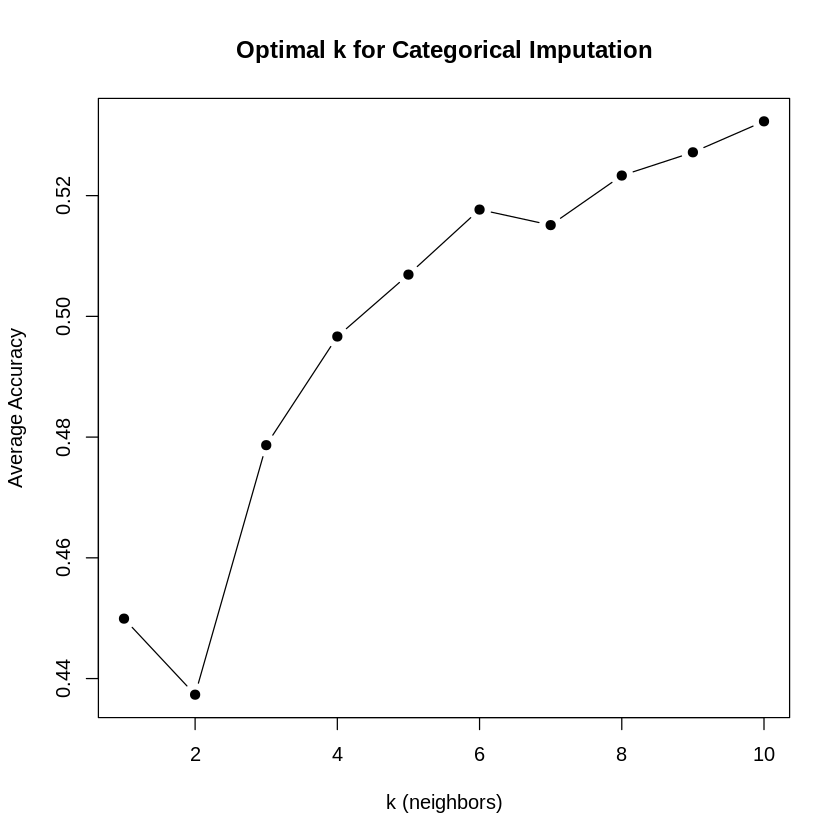

In [ ]:
set.seed(123)

# 1. Identify categorical columns with missing values
cat_cols <- names(df)[sapply(df, is.factor) | sapply(df, is.character)]
cat_cols <- cat_cols[colSums(is.na(df[cat_cols])) > 0]

# 2. Parameters
k_values <- 1:10
acc_results <- matrix(NA, nrow = length(k_values), ncol = length(cat_cols))
rownames(acc_results) <- paste0("k=", k_values)
colnames(acc_results) <- cat_cols

# 3. For each categorical column, mask values & compute accuracy
for (j in seq_along(cat_cols)) {
  col <- cat_cols[j]

  # Store original non-missing values
  known_idx <- which(!is.na(df[[col]]))
  test_idx <- sample(known_idx, size = floor(0.05 * length(known_idx)))

  df_masked <- df
  true_values <- df[[col]][test_idx]
  df_masked[[col]][test_idx] <- NA

  for (i in seq_along(k_values)) {
    k <- k_values[i]

    imputed_df <- kNN(df_masked, variable = col, k = k, imp_var = FALSE)
    pred_values <- imputed_df[[col]][test_idx]

    # Accuracy
    acc <- mean(pred_values == true_values)
    acc_results[i, j] <- acc
  }
}

# 4. Aggregate accuracy across columns
mean_acc <- rowMeans(acc_results, na.rm = TRUE)

# 5. Plot accuracy vs k
plot(k_values, mean_acc, type = "b", pch = 19,
     xlab = "k (neighbors)", ylab = "Average Accuracy",
     main = "Optimal k for Categorical Imputation")

best_k <- k_values[which.max(mean_acc)]
cat("✅ Best k =", best_k, "with avg. accuracy =", max(mean_acc), "\n")

✅ Best k = 23 with avg. accuracy = 0.5453687 


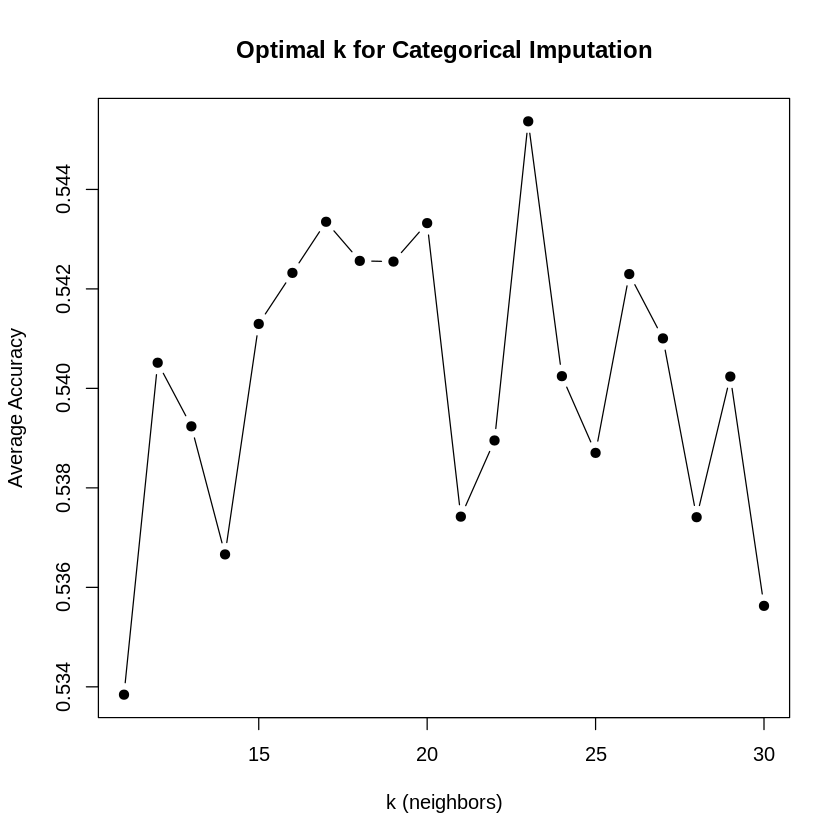

In [ ]:
set.seed(123)

# 1. Identify categorical columns with missing values
cat_cols <- names(df)[sapply(df, is.factor) | sapply(df, is.character)]
cat_cols <- cat_cols[colSums(is.na(df[cat_cols])) > 0]

# 2. Parameters
k_values <- 11:30
acc_results <- matrix(NA, nrow = length(k_values), ncol = length(cat_cols))
rownames(acc_results) <- paste0("k=", k_values)
colnames(acc_results) <- cat_cols

# 3. Setup parallel backend
num_cores <- parallel::detectCores() - 1
cl <- makeCluster(num_cores)
registerDoParallel(cl)

# 4. Parallel loop
results <- foreach(j = seq_along(cat_cols), .combine = 'cbind', .packages = 'VIM') %dopar% {
  col <- cat_cols[j]

  known_idx <- which(!is.na(df[[col]]))
  test_idx <- sample(known_idx, size = floor(0.05 * length(known_idx)))

  df_masked <- df
  true_values <- df[[col]][test_idx]
  df_masked[[col]][test_idx] <- NA

  acc_vec <- numeric(length(k_values))

  for (i in seq_along(k_values)) {
    k <- k_values[i]
    imputed_df <- kNN(df_masked, variable = col, k = k, imp_var = FALSE)
    pred_values <- imputed_df[[col]][test_idx]

    acc_vec[i] <- mean(pred_values == true_values)
  }

  acc_vec  # This will become one column of acc_results
}

# Stop cluster
stopCluster(cl)

# 5. Reshape and aggregate
acc_results <- matrix(results, nrow = length(k_values), ncol = length(cat_cols))
rownames(acc_results) <- paste0("k=", k_values)
colnames(acc_results) <- cat_cols

mean_acc <- rowMeans(acc_results, na.rm = TRUE)

# 6. Plot
plot(k_values, mean_acc, type = "b", pch = 19,
     xlab = "k (neighbors)", ylab = "Average Accuracy",
     main = "Optimal k for Categorical Imputation")

best_k <- k_values[which.max(mean_acc)]
cat("✅ Best k =", best_k, "with avg. accuracy =", max(mean_acc), "\n")

In [ ]:
# Execute random forest imputation

df_imputed <- kNN(df, variable=names(df), k=10, imp_var=FALSE)

In [ ]:
# Remove duplicates.

df <- check_remove_duplicates(df_imputed)

There are: 75 duplicates.

Duplicates removed.

In [ ]:
# Remove duplicates.

df <- check_remove_duplicates(df)

In [ ]:
# Check
sum(is.na(df))

[1] 0

In [ ]:
write.csv(df, "df_preprocessed_bank.csv", row.names = FALSE)

In [ ]:
table(df$y)


    0     1 
34519  4592 

In [ ]:
str(df)

'data.frame':	39111 obs. of  23 variables:
 $ age            : int  56 57 37 40 56 45 59 41 24 25 ...
 $ job            : Factor w/ 11 levels "admin.","blue-collar",..: 4 8 8 1 8 8 1 2 10 8 ...
 $ marital        : Factor w/ 3 levels "divorced","married",..: 2 2 2 2 2 2 2 2 3 3 ...
 $ education      : num  1 4 4 2 4 3 5 3 5 4 ...
 $ housing        : Factor w/ 3 levels "no","unknown",..: 1 1 3 1 1 1 1 1 3 3 ...
 $ loan           : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 1 1 1 ...
 $ mobile_phone   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ campaign       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays          : Factor w/ 5 levels "Moderate","Never",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ previous       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutcome       : Factor w/ 3 levels "failure","nonexistent",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ emp.var.rate   : num  1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 ...
 $ cons.price.idx : num  94 94 94 94 94 ...
 $ cons.conf.idx  : num  -36.4 -36.4 -36.4 -36.4 -36.4 -36.4 -36.4 -

In [ ]:
numerical.cols <- df[, sapply(df, is.numeric)]

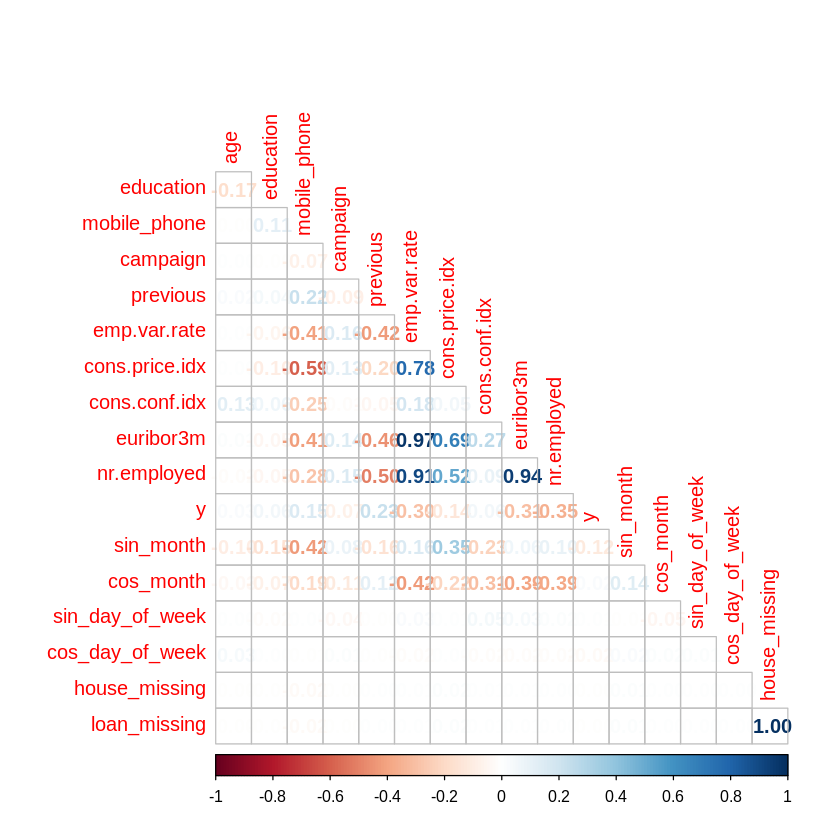

In [ ]:
corrplot(cor(numerical.cols), method='number', type='lower', diag=FALSE)